<a href="https://www.kaggle.com/code/loopedward/forecast-your-site-visits?scriptVersionId=141700362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Ingest

In [1]:
import pandas as pd

FILE_LOCATION = '/kaggle/input/daily-website-visitors/daily-website-visitors.csv'

whole_dataset = pd.read_csv(FILE_LOCATION, 
                            index_col='Date',
                            thousands=',')
whole_dataset

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
9/14/2014,1,Sunday,1,2146,1582,1430,152
9/15/2014,2,Monday,2,3621,2528,2297,231
9/16/2014,3,Tuesday,3,3698,2630,2352,278
9/17/2014,4,Wednesday,4,3667,2614,2327,287
9/18/2014,5,Thursday,5,3316,2366,2130,236
...,...,...,...,...,...,...,...
8/15/2020,2163,Saturday,7,2221,1696,1373,323
8/16/2020,2164,Sunday,1,2724,2037,1686,351
8/17/2020,2165,Monday,2,3456,2638,2181,457


In [2]:
whole_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2167 entries, 9/14/2014 to 8/19/2020
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Page.Loads         2167 non-null   int64 
 4   Unique.Visits      2167 non-null   int64 
 5   First.Time.Visits  2167 non-null   int64 
 6   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 135.4+ KB


In [3]:
whole_dataset.describe()

,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


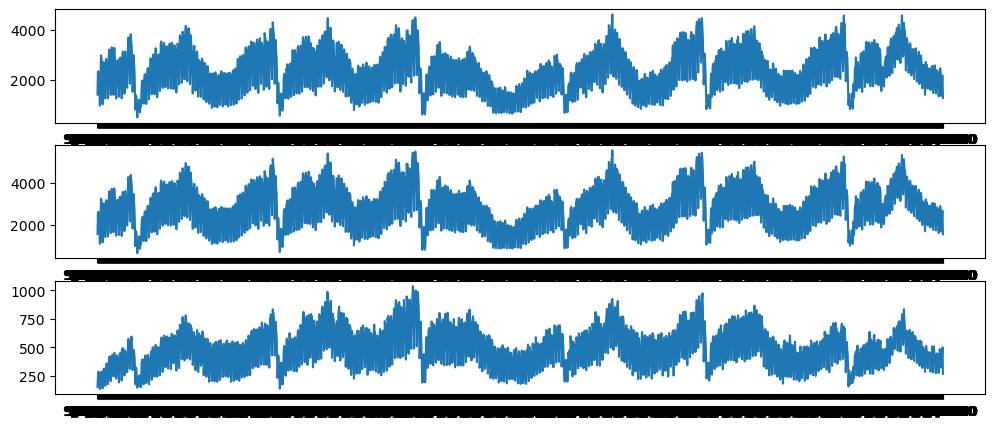

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(12, 5))

axs[0].plot(whole_dataset['First.Time.Visits'])
axs[1].plot(whole_dataset['Unique.Visits'])
axs[2].plot(whole_dataset['Returning.Visits'])
plt.show()

# Preprocessing the data

* Target Attribute: **Returning.Visits** 
We shall predict the **Returning.Visits** given past data.


In [5]:
target_column = whole_dataset['Returning.Visits']
target_column

Date
9/14/2014    152
9/15/2014    231
9/16/2014    278
9/17/2014    287
9/18/2014    236
            ... 
8/15/2020    323
8/16/2020    351
8/17/2020    457
8/18/2020    499
8/19/2020    267
Name: Returning.Visits, Length: 2167, dtype: int64

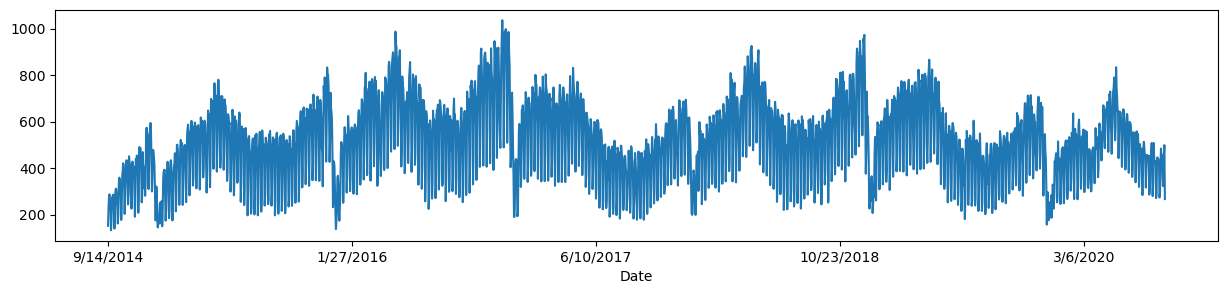

In [6]:
target_column.plot(figsize=(15, 3))
plt.show()

# Compute Train and Test Data Boundaries

In [7]:
len(target_column)

2167

In [8]:
TEST_DATA_PERCENTAGE = 0.1

TEST_DATA_BOUNDARY_INDEX = int((1 - TEST_DATA_PERCENTAGE) * len(target_column))
print(f"Train data:\tReturning Visits [:{TEST_DATA_BOUNDARY_INDEX}] ({TEST_DATA_BOUNDARY_INDEX + 1})")
print(f"Test data:\tReturning Visits [{TEST_DATA_BOUNDARY_INDEX}:] ({len(target_column) - TEST_DATA_BOUNDARY_INDEX})")
print(f"\nLast target on train data: {target_column[TEST_DATA_BOUNDARY_INDEX]}")

Train data:	Returning Visits [:1950] (1951)
Test data:	Returning Visits [1950:] (217)

Last target on train data: 441


In [9]:
print(f"Train dataset ending values: {target_column[TEST_DATA_BOUNDARY_INDEX - 10: TEST_DATA_BOUNDARY_INDEX].values}")
print(f"Test dataset starting values: {target_column[TEST_DATA_BOUNDARY_INDEX: TEST_DATA_BOUNDARY_INDEX + 10].values}")

Train dataset ending values: [429 423 442 464 372 253 277 515 434 394]
Test dataset starting values: [441 413 246 314 443 484 473 490 353 249]


## Window-ize the dataset

In [10]:
from tensorflow.keras.utils import timeseries_dataset_from_array

# WINDOW_SIZE = 14
WINDOW_SIZE = 3
train_dataset = timeseries_dataset_from_array(target_column[:-WINDOW_SIZE], 
                                                 target_column[WINDOW_SIZE:], 
                                                 sequence_length=WINDOW_SIZE,
                                                 end_index=TEST_DATA_BOUNDARY_INDEX - 1)
len(train_dataset), len(list(train_dataset.unbatch()))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

(16, 1947)

In [11]:
target_column[1700:1751].values, (list(train_dataset)[-1][0][-1].numpy(), list(train_dataset)[-1][1][-1].numpy())

(array([417, 495, 772, 692, 678, 624, 541, 331, 410, 636, 593, 659, 545,
        489, 311, 371, 509, 636, 553, 543, 454, 253, 329, 536, 582, 494,
        559, 444, 259, 344, 567, 594, 585, 564, 476, 266, 328, 527, 552,
        531, 478, 422, 242, 304, 442, 523, 489, 474, 364, 216, 254]),
 (array([277, 515, 434]), 394))

In [12]:
test_dataset = timeseries_dataset_from_array(target_column[:-WINDOW_SIZE], 
                                                 target_column[WINDOW_SIZE:], 
                                                 sequence_length=WINDOW_SIZE,
                                                 start_index=TEST_DATA_BOUNDARY_INDEX - WINDOW_SIZE)
len(test_dataset), len(list(test_dataset.unbatch()))

(2, 215)

In [13]:
target_column[1700:1751].values, list(test_dataset)[0][0][0].numpy(), list(test_dataset)[0][1][0].numpy()

(array([417, 495, 772, 692, 678, 624, 541, 331, 410, 636, 593, 659, 545,
        489, 311, 371, 509, 636, 553, 543, 454, 253, 329, 536, 582, 494,
        559, 444, 259, 344, 567, 594, 585, 564, 476, 266, 328, 527, 552,
        531, 478, 422, 242, 304, 442, 523, 489, 474, 364, 216, 254]),
 array([515, 434, 394]),
 441)

## Plot the train and test datasets

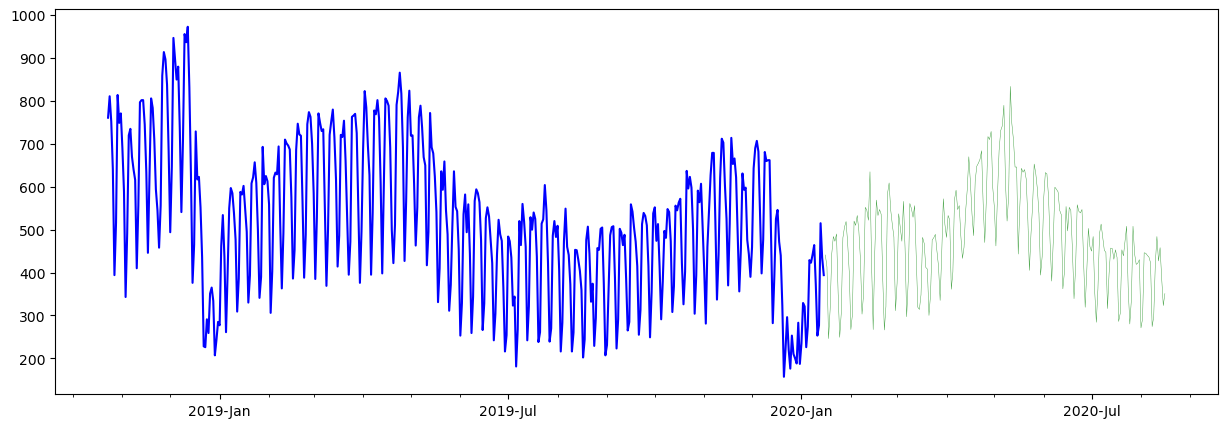

In [14]:
import numpy as np 
import matplotlib.dates as mdates

def plot_time_series(predictions = None, start_index=1500):
    timesteps = pd.to_datetime(target_column.index)
    
    fig,ax = plt.subplots(1,figsize=(15,5))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

    
    # Plot train dataset
    plt.plot(timesteps[start_index:TEST_DATA_BOUNDARY_INDEX], target_column[start_index:TEST_DATA_BOUNDARY_INDEX],
            color='blue')
    # Plot test dataset
    plt.plot(timesteps[TEST_DATA_BOUNDARY_INDEX:-WINDOW_SIZE], target_column[TEST_DATA_BOUNDARY_INDEX:-WINDOW_SIZE],
             color='green', linewidth=0.3, alpha=0.8)
    
    if predictions is not None:
        pred_timesteps = timesteps[TEST_DATA_BOUNDARY_INDEX:-WINDOW_SIZE + 1]
        plt.plot(pred_timesteps, predictions, linewidth=0.4, color='red')
        plt.scatter(pred_timesteps, predictions, s=0.4, color='red')

        
plot_time_series()

# Model 0: Baseline model

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model

class NaiveForecastLayer(Model):
    def __init__(self):
        super().__init__()
        
    def call(self, inputs):
        print("inputs", inputs)
        result = inputs[:, -1]
        return result[:, tf.newaxis]


In [16]:
baseline_model = NaiveForecastLayer()
baseline_model._name = 'model_0'

baseline_model.compile(metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [17]:
baseline_predictions = baseline_model.predict(test_dataset)

inputs Tensor("IteratorGetNext:0", shape=(None, None), dtype=int64)
2/2 [==============================] - 0s 15ms/step


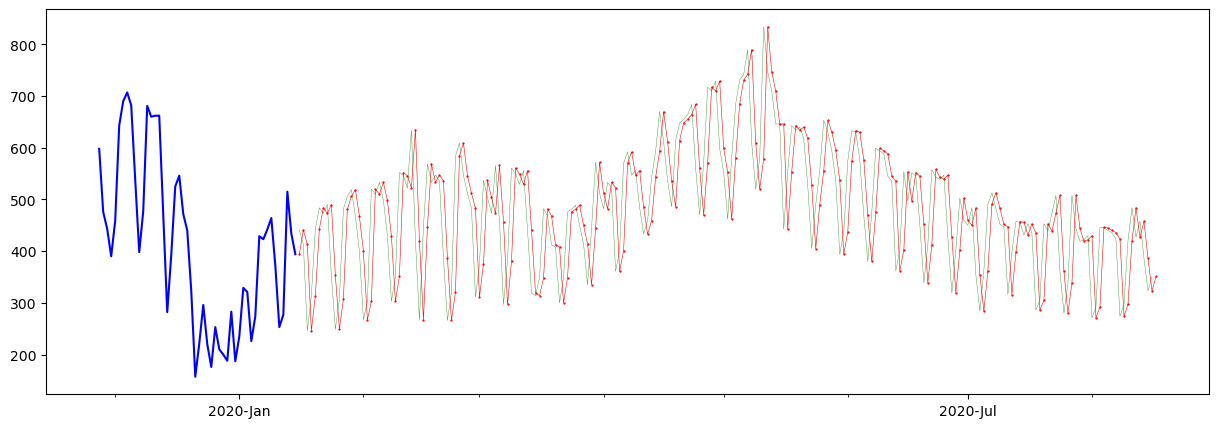

In [18]:
plot_time_series(baseline_predictions.ravel(), start_index=1900)

In [19]:
y_true = target_column[TEST_DATA_BOUNDARY_INDEX : -WINDOW_SIZE + 1]

len(y_true), y_true

(215,
 Date
 1/16/2020    441
 1/17/2020    413
 1/18/2020    246
 1/19/2020    314
 1/20/2020    443
             ... 
 8/13/2020    458
 8/14/2020    386
 8/15/2020    323
 8/16/2020    351
 8/17/2020    457
 Name: Returning.Visits, Length: 215, dtype: int64)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def evaluate_predictions(y_true, y_preds):
    mae = mean_absolute_error(y_true, y_preds)
    mse = mean_squared_error(y_true, y_preds)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_preds)
    
    return {
        'mae': mae,
        'mse': mse, 
        "rmse": rmse,
        "mape": mape
    }

evaluate_predictions(y_true, baseline_predictions)

{'mae': 71.5953488372093,
 'mse': 8329.223255813953,
 'rmse': 91.2645783193784,
 'mape': 0.16426112213124808}

In [21]:
MODEL_METRICS = pd.DataFrame(columns=['mae', 'mse', 'rmse', 'mape'])

def evaluate_model(model):
    predictions = model.predict(test_dataset, verbose=0)
    metrics = evaluate_predictions(y_true, predictions)
    
    MODEL_METRICS.loc[model.name] = metrics
    plot_time_series(predictions.ravel(), start_index=1900)
    return metrics

{'mae': 71.5953488372093,
 'mse': 8329.223255813953,
 'rmse': 91.2645783193784,
 'mape': 0.16426112213124808}

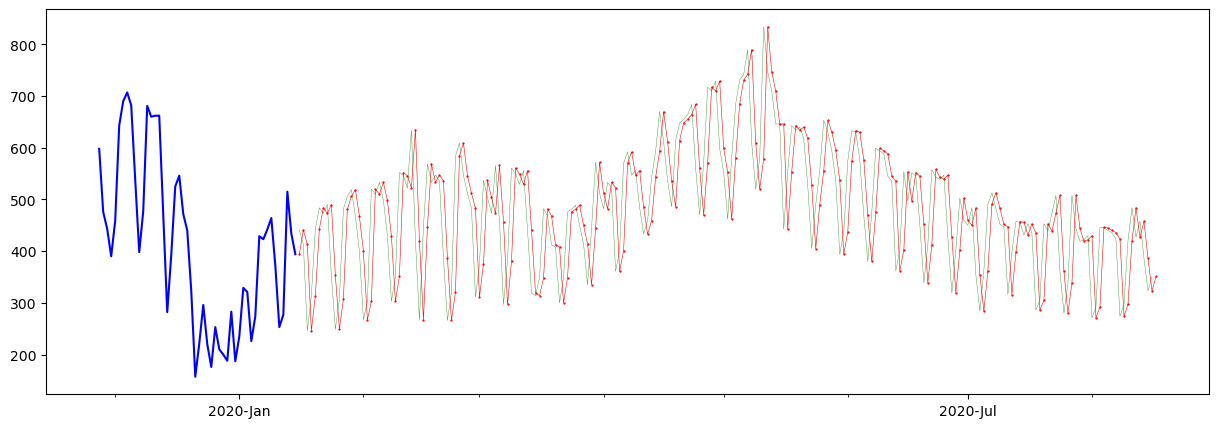

In [22]:
evaluate_model(baseline_model)

In [23]:
MODEL_METRICS

,mae,mse,rmse,mape
model_0,71.595349,8329.223256,91.264578,0.164261


# Model 1: Recurrent Network Model (GRU)

In [24]:
from tensorflow.keras.layers import GRU, Dense, Input, Lambda
from tensorflow.keras import Sequential

tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape=(WINDOW_SIZE,)),
    Lambda(lambda x: tf.expand_dims(x, axis=1)),
    GRU(64, activation="relu"),
    Dense(1)
], name='model_1')

model_1.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam()
)

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 3)              0         
                                                                 
 gru (GRU)                   (None, 64)                13248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

def create_checkpoint_callback(model):
    filepath = os.path.join('models', model.name)
    return ModelCheckpoint(filepath, monitor='loss', save_weights_only=True, save_best_only=True)


model_1.fit(train_dataset, epochs=5, callbacks=[ create_checkpoint_callback(model_1) ])

Epoch 1/5
16/16 [==============================] - 7s 23ms/step - loss: 461.4791
Epoch 2/5
16/16 [==============================] - 0s 21ms/step - loss: 321.8697
Epoch 3/5
16/16 [==============================] - 0s 22ms/step - loss: 184.5191
Epoch 4/5
16/16 [==============================] - 0s 22ms/step - loss: 140.6314
Epoch 5/5
16/16 [==============================] - 0s 20ms/step - loss: 133.1063


{'mae': 85.05507315702216,
 'mse': 10659.278094884454,
 'rmse': 103.24377993314877,
 'mape': 0.18477111797074494}

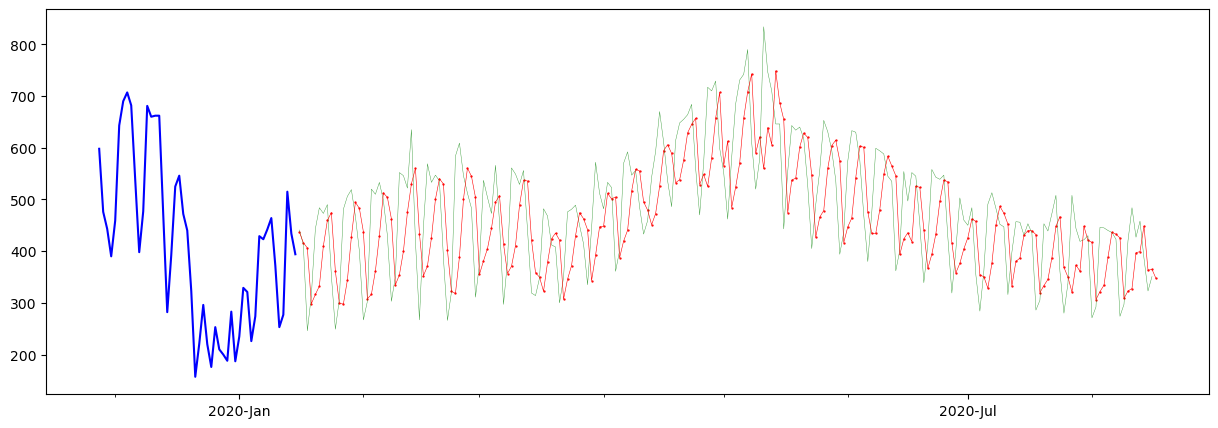

In [26]:
evaluate_model(model_1)

In [27]:
MODEL_METRICS

,mae,mse,rmse,mape
model_0,71.595349,8329.223256,91.264578,0.164261
model_1,85.055073,10659.278095,103.243780,0.184771
